# Web Mining and Applied NLP (44-620)

## Final Project: Article Summarizer

### Student Name: Naiema Elsaadi

<b>My GitHub Repository is at :[GitHub Repository](https://github.com/NaiemaElsaadi/article-summarizer-Final-Project)

Welcome to my Python Notebooks, Basics, and Data Structures repository! The project aims to assist users in quickly understanding the sentiment of articles and identifying key information without having to read the entire text. It can be useful for researchers, journalists, and anyone interested in understanding the emotional content of written text.

### Question 1

<b>Q1. Find on the internet an article or blog post about a topic that interests you and you are able to get the text for using the technologies we have applied in the course.  Get the html for the article and store it in a file (which you must submit with your project)


The article I am interested in is titled 'Microsoft and Quantinuum’s quantum computer may be most reliable yet' and can be found at the following URL
 https://www.newscientist.com/article/2425243-microsoft-and-quantinuums-quantum-computer-may-be-most-reliable-yet/

In [1]:
import requests

# URL of the article
url = "https://www.newscientist.com/article/2425243-microsoft-and-quantinuums-quantum-computer-may-be-most-reliable-yet/"

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Get the HTML content of the webpage
    html_content = response.text
    
    # Save the HTML content to a file
    with open("article.html", "w", encoding="utf-8") as f:
        f.write(html_content)
        
    print("Article HTML content has been saved to 'article.html'")
else:
    print("Failed to retrieve the article. Status code:", response.status_code)


Article HTML content has been saved to 'article.html'


In [2]:
from bs4 import BeautifulSoup

# Read the HTML content from the saved file
with open('article.html', 'r', encoding='utf-8') as file:
    html_content = file.read()

# Parse HTML and extract plain text
soup = BeautifulSoup(html_content, 'html.parser')
article_text = soup.get_text()

# Save plain text to a new file
with open('article.txt', 'w', encoding='utf-8') as file:
    file.write(article_text)

print("Article content has been saved to 'article.txt'")


Article content has been saved to 'article.txt'


In [3]:
import requests
url = "https://www.newscientist.com/article/2425243-microsoft-and-quantinuums-quantum-computer-may-be-most-reliable-yet/"

response = requests.get("https://www.newscientist.com/article/2425243-microsoft-and-quantinuums-quantum-computer-may-be-most-reliable-yet/"
)

print(response.status_code)
print(response.headers['content-type'])

200
text/html; charset=UTF-8


In [4]:
import requests
from bs4 import BeautifulSoup
import pickle
url = "https://www.newscientist.com/article/2425243-microsoft-and-quantinuums-quantum-computer-may-be-most-reliable-yet/"

# parser = 'html5lib'
parser = 'html.parser'

soup = BeautifulSoup(response.text, parser)

article_page = requests.get(url)
article_html = article_page.text



with open('article.pkl', 'wb') as f:
    pickle.dump(article_page.text, f)

# Load the pickled data
with open('article.pkl', 'rb') as f:
    article_html = pickle.load(f)

    soup = BeautifulSoup(article_html, parser)
article_element = soup.find('article')

# Print the pickled data
print(article_element)
   



<article class="ArticlePageWrapper post-2425243" id="2425243">
<div class="Grid__Row SM12 LG8">
<div class="Grid__Column">
<section class="ArticleHeader">
<div class="ArticleHeader__CopyWrapper">
<header>
<h4 class="ArticleHeader__Category">
<a class="ArticleHeader__CategoryLink" data-analytics-hook="article-header-subject-link" href="/subject/technology/">Technology</a>
</h4>
<h1 class="ArticleHeader__Heading">Microsoft and Quantinuum’s quantum computer may be most reliable yet</h1>
<p class="ArticleHeader__Copy">A quantum computer built by Quantinuum uses “logical quantum bits” designed by Microsoft to run simple computational routines with an unprecedented level of reliability</p>
<p class="ArticleHeader__Author"><span class="ArticleHeader__AuthorLinks">By <a class="ArticleHeader__NameLink" href="/author/karmela-padavic-callaghan/">Karmela Padavic-Callaghan</a></span></p>
<div class="ArticleHeader__DateTimeWrapper">
<svg class="ArticleHeader__DateTimeIcon" fill="none" height="25" ti

In [5]:
from bs4 import BeautifulSoup
import pickle

# Read the HTML content from the file
with open("article.pkl", "rb") as f:
    html_content = pickle.load(f)

# Parse the HTML content
soup = BeautifulSoup(html_content, "html.parser")

# Find the article element
article_element = soup.find("article")

# Get the text from the article element
article_text = article_element.get_text()

# Print the text
print(article_text)









Technology

Microsoft and Quantinuum’s quantum computer may be most reliable yet
A quantum computer built by Quantinuum uses “logical quantum bits” designed by Microsoft to run simple computational routines with an unprecedented level of reliability
By Karmela Padavic-Callaghan



                                    3 April 2024
                                                                    




Facebook / Meta







Twitter / X icon





WhatsApp







Linkedin







Reddit







Email












 



The Quantinuum H2 chipQuantinuum
Microsoft and the quantum computing firm Quantinuum claim to have made a quantum computer that has an unprecedented level of reliability. Its ability to correct its own errors could be a step towards more practical quantum computers in the near future.
“What we did here gives me goosebumps. We have shown that error correction is repeatable, it is working and it is reliable,” says Krysta Svore at Microsoft.
Experts have long anticipated th

### Question 2

<b>Q2. Read in your article's html source from the file you created in question 1 and do sentiment analysis on the article/post's text (use `.get_text()`).  Print the polarity score with an appropriate label.  Additionally print the number of sentences in the original article (with an appropriate label)

In [6]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob
from bs4 import BeautifulSoup
from textblob import TextBlob

# Calculate polarity score by using nlp
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')
doc = nlp(article_element.get_text())
print(f'Polarity: {doc._.polarity}')

# calculate polarity score by using blob
# Perform sentiment analysis
blob = TextBlob(article_text)
polarity_score = blob.sentiment.polarity

# Count the number of sentences
num_sentences = len(blob.sentences)

# Print the polarity score and number of sentences
print("Sentiment Polarity Score:", polarity_score)
print("Number of Sentences:", num_sentences)




Polarity: 0.17878080253080258
Sentiment Polarity Score: 0.17878080253080258
Number of Sentences: 32


### Question 3

<b>Q3. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent tokens (converted to lower case).  Print the common tokens with an appropriate label.  Additionally, print the tokens their frequencies (with appropriate labels)

In [7]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

nlp = spacy.load('en_core_web_sm')
doc = nlp(article_element.get_text())
from collections import Counter

def important_token(token):
    return not (token.is_space or token.is_punct or token.is_stop)

interesting_tokens = [token.text.lower() for token in doc if important_token(token)]
word_freq = Counter(map(str,interesting_tokens))
best_token = (word_freq.most_common(5))

## print Print the common tokens with an appropriate label
print("Tokens and Their Frequencies :")
print(best_token)
best_tokens = set()
for token, freq in word_freq.most_common(5):
    best_tokens.add(token)
 ## print 5 Most Frequent tokens
print("5 Most Frequent tokens : ", best_tokens)

Tokens and Their Frequencies :
[('quantum', 23), ('qubits', 19), ('logical', 13), ('error', 10), ('quantinuum', 8)]
5 Most Frequent tokens :  {'logical', 'quantum', 'quantinuum', 'qubits', 'error'}


### Question 4

<b>Q4. Load the article text into a trained `spaCy` pipeline, and determine the 5 most frequent lemmas (converted to lower case).  Print the common lemmas with an appropriate label.  Additionally, print the lemmas with their frequencies (with appropriate labels).

In [8]:
interesting_lemmas = [token.lemma_.lower() for token in doc if important_token(token)]
lemma_freq = Counter(interesting_lemmas)
best_lemmas= lemma_freq.most_common(5)

# Print lemmas and their frequencies
print("Lemmas and Their Frequencies :")
print(best_lemmas)
best_lemmas = set()
for lemma, freq in lemma_freq.most_common(5):
    best_lemmas.add(lemma)
    
# Print the set of the 5 most frequent lemmas
print("5 Most Frequent Lemmas ", best_lemmas)

Lemmas and Their Frequencies :
[('quantum', 23), ('qubit', 20), ('error', 17), ('logical', 13), ('computer', 11)]
5 Most Frequent Lemmas  {'logical', 'quantum', 'qubit', 'error', 'computer'}


### Question 5

<b>Q5. Make a list containing the scores (using tokens) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores. From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [9]:
sentences = list(doc.sents) # Finds score for each sentence
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in best_tokens:
            count1+= 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)

0.12987012987012986 : TechnologyMicrosoft and Quantinuum’s quantum computer may be most reliable yetA quantum computer built by Quantinuum uses “logical quantum bits” designed by Microsoft to run simple computational routines with an unprecedented level of reliabilityBy Karmela Padavic-Callaghan                  3 April 2024                                  Facebook / MetaTwitter / X iconWhatsAppLinkedinRedditEmail The Quantinuum H2 chipQuantinuumMicrosoft and the quantum computing firm Quantinuum claim to have made a quantum computer that has an unprecedented level of reliability.
0.05 : Its ability to correct its own errors could be a step towards more practical quantum computers in the near future.
0.0 : “What we did here gives me goosebumps.
0.05 : We have shown that error correction is repeatable, it is working and it is reliable,” says Krysta Svore at Microsoft.
0.047619047619047616 : Experts have long anticipated the arrival of practical quantum computers, which could complete c

In [10]:
tscores = []
for sentence in sentences:
    count1= 0
    for token in sentence:
        if token.text.lower() in best_tokens:
            count1 += 1
    count2 = 0
    for token in sentence:
        if not(token.is_space or token.is_punct):
            count2 += 1
    score = count1 / count2 if count2 > 0 else 0
    tscores.append(score)

print("TokensLIST =", tscores)


TokensLIST = [0.12987012987012986, 0.05, 0.0, 0.05, 0.047619047619047616, 0.05555555555555555, 0.03333333333333333, 0.125, 0.0, 0.12121212121212122, 0.043478260869565216, 0.13333333333333333, 0.19047619047619047, 0.26666666666666666, 0.0, 0.09375, 0.13043478260869565, 0.09375, 0.18181818181818182, 0.10204081632653061, 0.09523809523809523, 0.1111111111111111, 0.0, 0.08823529411764706, 0.15384615384615385, 0.14814814814814814, 0.07692307692307693, 0.06666666666666667, 0.09375, 0.0, 0.05, 0.05263157894736842, 0.0, 0.0]


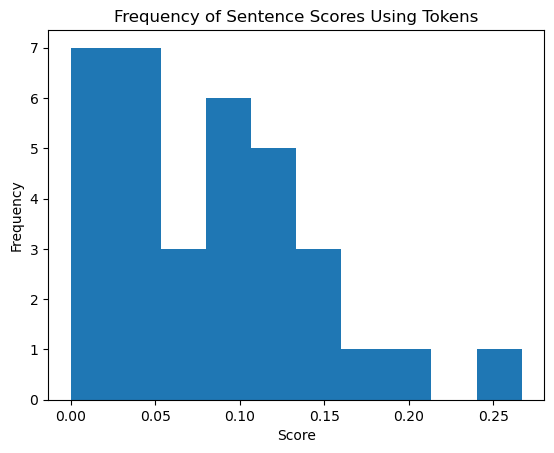

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Plot histogram
plt.hist(tscores)
plt.title('Frequency of Sentence Scores Using Tokens')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Based on the histogram, the most common range of scores appears to be between 0 and 0.05

### Question 6

<b>Q6. Make a list containing the scores (using lemmas) of every sentence in the article, and plot a histogram with appropriate titles and axis labels of the scores.  From your histogram, what seems to be the most common range of scores (put the answer in a comment after your code)?

In [12]:
sentences = list(doc.sents) # Find Score Each Sentence
for sentence in sentences:
    count1= 0
    for lemma in sentence:
        if lemma.lemma_.lower() in best_lemmas:
            count1+= 1
    count2 = 0
    for lemma in sentence:
        if not(lemma.is_space or lemma.is_punct):
            count2 += 1
    sent_str = str(sentence).replace('\n','').replace('  ',' ')
    print(count1/count2,':',sent_str)


0.11688311688311688 : TechnologyMicrosoft and Quantinuum’s quantum computer may be most reliable yetA quantum computer built by Quantinuum uses “logical quantum bits” designed by Microsoft to run simple computational routines with an unprecedented level of reliabilityBy Karmela Padavic-Callaghan                  3 April 2024                                  Facebook / MetaTwitter / X iconWhatsAppLinkedinRedditEmail The Quantinuum H2 chipQuantinuumMicrosoft and the quantum computing firm Quantinuum claim to have made a quantum computer that has an unprecedented level of reliability.
0.15 : Its ability to correct its own errors could be a step towards more practical quantum computers in the near future.
0.0 : “What we did here gives me goosebumps.
0.05 : We have shown that error correction is repeatable, it is working and it is reliable,” says Krysta Svore at Microsoft.
0.14285714285714285 : Experts have long anticipated the arrival of practical quantum computers, which could complete ca

In [13]:
# Initialize list to store lemma scores
lscores = []

# Loop through each sentence to calculate lemma scores
for sentence in sentences:
    count1 = 0
    for token in sentence:
        if token.lemma_.lower() in best_lemmas:
            count1 += 1
    
    count2 = 0
    for token in sentence:
        if not (token.is_space or token.is_punct):
            count2 += 1
    
    # Calculate lemma score for the sentence
    score = count1 / count2 if count2 > 0 else 0
    lscores.append(score)

# Print the list of lemma scores
print("LemmasLIST =", lscores)

LemmasLIST = [0.11688311688311688, 0.15, 0.0, 0.05, 0.14285714285714285, 0.1111111111111111, 0.1, 0.125, 0.0, 0.09090909090909091, 0.13043478260869565, 0.13333333333333333, 0.19047619047619047, 0.2, 0.0, 0.09375, 0.17391304347826086, 0.125, 0.22727272727272727, 0.10204081632653061, 0.09523809523809523, 0.1111111111111111, 0.0, 0.08823529411764706, 0.15384615384615385, 0.2222222222222222, 0.07692307692307693, 0.06666666666666667, 0.125, 0.0, 0.0, 0.05263157894736842, 0.0, 0.0]


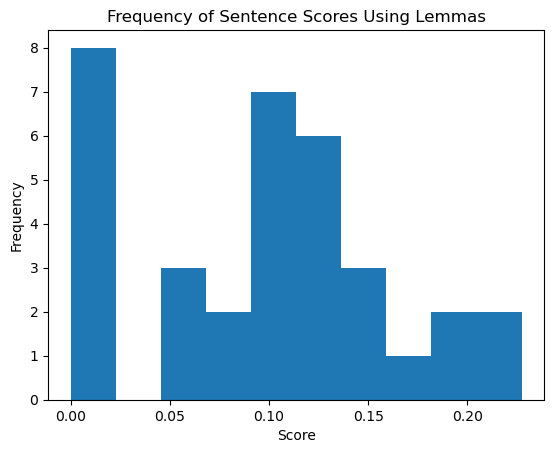

In [14]:
# Plot histogram
plt.hist(lscores)
plt.title('Frequency of Sentence Scores Using Lemmas')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

Based on the histogram, the most common range of scores appears to be between 0.1 and 0.15

### Question 7

<B>Q7. Using the histograms from questions 5 and 6, decide a "cutoff" score for tokens and lemmas such that fewer than half the sentences would have a score greater than the cutoff score.  Record the scores in this Markdown cell

* Cutoff Score (tokens):  0.13
* Cutoff Score (lemmas):  0.15

Feel free to change these scores as you generate your summaries.  Ideally, we're shooting for at least 6 sentences for our summary, but don't want more than 10 (these numbers are rough estimates; they depend on the length of your article).

In [15]:
## To calculate the ideal cutoff score for tokens, the Percentile was used.
import numpy as np

# Convert the list of sentiment scores to a numpy array for easier calculation
scores_array = np.array(tscores)

# Calculate the cutoff score as the 25th percentile
cutoff_score_tokens = np.percentile(scores_array, 80)

print("Cutoff Score (tokens):", cutoff_score_tokens)


Cutoff Score (tokens): 0.13009599096555619


In [16]:
## To calculate the ideal cutoff score for lammas, the Percentile was used.
import numpy as np

# Convert the list of sentiment scores to a numpy array for easier calculation
scores_array = np.array(lscores)

# Calculate the cutoff score as the 25th percentile
cutoff_score_lammas = np.percentile(scores_array, 80)

print("Cutoff Score (lammas):", cutoff_score_lammas)


Cutoff Score (lammas): 0.1457142857142857


In [17]:
## To calculate the ideal cutoff score for tokens, the mean and std were used.
import numpy as np

# Convert the list of sentiment scores to a numpy array for easier calculation
scores_array = np.array(tscores)

# Calculate the mean and standard deviation of the sentiment scores
mean_score = np.mean(scores_array)
std_score = np.std(scores_array)

# Add a certain number of standard deviations to the mean to determine the cutoff score
# Adjust the multiplier as needed based on your requirements
multiplier = 0.8  # You can adjust this multiplier based on your preference
cutoff_score_tokens = mean_score + multiplier * std_score

print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)
print("Cutoff Score (tokens):", cutoff_score_tokens)


Mean Score: 0.08190848660845937
Standard Deviation: 0.0629900541138513
Cutoff Score (tokens): 0.13230052989954041


In [18]:
## To calculate the ideal cutoff score for lammas, the mean and std were used.
import numpy as np

# Convert the list of sentiment scores to a numpy array for easier calculation
scores_array = np.array(lscores)

# Calculate the mean and standard deviation of the sentiment scores
mean_score = np.mean(scores_array)
std_score = np.std(scores_array)

# Add a certain number of standard deviations to the mean to determine the cutoff score
# Adjust the multiplier as needed based on your requirements
multiplier = 0.8  # You can adjust this multiplier based on your preference
cutoff_score_lammas = mean_score + multiplier * std_score

print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)
print("Cutoff Score (lammas):", cutoff_score_lammas)

Mean Score: 0.09573104571554533
Standard Deviation: 0.06697693741560654
Cutoff Score (lammas): 0.14931259564803057


### Question 8

<B>Q8. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on tokens) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [19]:
##### Initialize an empty list to store the sentences of the summary
summary_sentences = []

# Adjust the cutoff score to make the summary longer
cutoff_score_tokens= 0.13

# Iterate through each sentence in the article
for sentence, score in zip(sentences, tscores):
    # Check if the score of the sentence is greater than the lower cutoff score
    if score > cutoff_score_tokens:
        # Add the text of the sentence to the summary list after stripping any leading/trailing whitespace
        summary_sentences.append(sentence.text.strip())

# Generate the summary text by joining the sentences in the list together with a space
summary_text = ' '.join(summary_sentences)

# Print the summary text
print("Summary:")
print(summary_text)


Summary:
This approach isn’t possible in quantum computing because quantum information cannot be copied. So, instead, researchers spread it across groups of connected quantum bits, or qubits, to create what are known as logical qubits. The Microsoft and Quantinuum team used 30 qubits to make four of these logical qubits. Individual qubits are typically easily disturbed, but at the level of the logical qubits, the researchers could repeatedly detect and correct the errors. This means the ungrouped qubits would have produced as many as 800 errors for every one error produced by the logical qubits. This is far more than the four logical qubits in the new device. But Strabley says the new device requires fewer physical qubits per logical qubit, and the logical qubits made fewer errors than those built by the Harvard team.


### Question 9

<B>Q9. Print the polarity score of your summary you generated with the token scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [20]:
import spacy

# Load a pre-trained spaCy pipeline for sentiment analysis
nlp_sentiment = spacy.load("en_core_web_sm")

# Process the summary text using spaCy for sentiment analysis
summary_doc = nlp_sentiment(summary_text)

# Use the sentiment score of the summary directly as its polarity score
summary_polarity_score = summary_doc.sentiment

# Print the polarity score of the summary with an appropriate label
print("Polarity Score of the Summary:", summary_polarity_score)

# Count the number of sentences in the summarized article
num_sentences_summary = len(list(summary_doc.sents))

# Print the number of sentences in the summarized article with an appropriate label
print("Number of Sentences in the Summarized Article:", num_sentences_summary)


Polarity Score of the Summary: 0.0
Number of Sentences in the Summarized Article: 7


### Question 10

<B>Q10. Create a summary of the article by going through every sentence in the article and adding it to an (initially) empty list if its score (based on lemmas) is greater than the cutoff score you identified in question 8.  If your loop variable is named `sent`, you may find it easier to add `sent.text.strip()` to your list of sentences.  Print the summary (I would cleanly generate the summary text by `join`ing the strings in your list together with a space (`' '.join(sentence_list)`).

In [21]:
# Initialize an empty list to store the sentences of the summary based on lemmas
summary_sentences_lemmas = []
cutoff_score_lemmas = 0.15
# Iterate through each sentence in the article
for sentence, score in zip(sentences, lscores):
    # Check if the score of the sentence is greater than the cutoff score
    if score > cutoff_score_lemmas:
        # Add the text of the sentence to the summary list after stripping any leading/trailing whitespace
        summary_sentences_lemmas.append(sentence.text.strip())

# Generate the summary text based on lemmas by joining the sentences in the list together with a space
summary_text_lemmas = ' '.join(summary_sentences_lemmas)

# Print the summary text based on lemmas
print("Summary based on Lemmas:")
print(summary_text_lemmas)


Summary based on Lemmas:
So, instead, researchers spread it across groups of connected quantum bits, or qubits, to create what are known as logical qubits. The Microsoft and Quantinuum team used 30 qubits to make four of these logical qubits. Individual qubits are typically easily disturbed, but at the level of the logical qubits, the researchers could repeatedly detect and correct the errors. This means the ungrouped qubits would have produced as many as 800 errors for every one error produced by the logical qubits. This is far more than the four logical qubits in the new device. But Strabley says the new device requires fewer physical qubits per logical qubit, and the logical qubits made fewer errors than those built by the Harvard team.


### Question 11

<B>Q11. Print the polarity score of your summary you generated with the lemma scores (with an appropriate label). Additionally, print the number of sentences in the summarized article.

In [22]:
import spacy

# Load a pre-trained spaCy pipeline for sentiment analysis
nlp_sentiment = spacy.load("en_core_web_sm")

# Process the summary text based on lemmas using spaCy for sentiment analysis
summary_doc_lemmas = nlp_sentiment(summary_text_lemmas)

# Calculate the polarity score of the summary based on lemmas
summary_polarity_score_lemmas = summary_doc_lemmas.sentiment

# Print the polarity score of the summary based on lemmas with an appropriate label
print("Polarity Score of the Summary (Lemmas):", summary_polarity_score_lemmas)

# Count the number of sentences in the summarized article based on lemmas
num_sentences_summary_lemmas = len(list(summary_doc_lemmas.sents))

# Print the number of sentences in the summarized article based on lemmas with an appropriate label
print("Number of Sentences in the Summarized Article (Lemmas):", num_sentences_summary_lemmas)


Polarity Score of the Summary (Lemmas): 0.0
Number of Sentences in the Summarized Article (Lemmas): 6


### Question 12

<b>Q12.  Compare your polarity scores of your summaries to the polarity scores of the initial article.  Is there a difference?  Why do you think that may or may not be?.  Answer in this Markdown cell.  

My polarity scores of my summaries for both tokens and lemmas were both neutral showing that there wasnt any signs of an evident sentiment towards the topic. In the initial article however, the polarity scores for both tokens and lemmas were evidently postive, showing that the the percieved sentiment of the article was positive towards the topic. I think that the difference in polarity scores is because an AI does not have the ability to effectively mimic the emotionality of humans, which can cause large differences in polarity scores, and also causing for the polarity scores for the summaries to almost always be close to neural.

### Question 13

<B>Q13. Based on your reading of the original article, which summary do you think is better (if there's a difference).  Why do you think this might be?

I think that the first summary (the token summary), is better. I think this, because it gives a much stronger introduction into the topic, while the lemmas summary gave a very subpar introduction that was hard to understand and did not do a good job in explaining what the article was about. The first summary was also put into much simpler terms, which helped to explain the point of the article better than the lemmas article. I think that this may be because, although lemmas might be better at generalizing the summary, the token summary ended up better, because tokens are better at creating summaries that closely match the article.

In [23]:
!jupyter nbconvert --to html article-summarizer.ipynb

[NbConvertApp] Converting notebook article-summarizer.ipynb to html
[NbConvertApp] Writing 747977 bytes to article-summarizer.html
